# Лаб 4
Линейные модели, SVM и деревья решений

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Загрузка и предобработка данных


In [15]:
from sklearn.datasets import load_diabetes

In [16]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [17]:
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Масштабирование признаков

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3) Разделение на обучающую и тестовую выборки

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Обучение моделей


1) Логистическая регрессия

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

2) SVM

In [21]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

3) Дерево решений

In [22]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Оценка качества моделей
accuracy и F1-score

In [23]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
print("Logistic Regression:") # ИСПРАВИТЬ, линейная вместо логистической!!!
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log, average='weighted'))

print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted'))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree, average='weighted'))

Logistic Regression:
Accuracy: 0.0
F1-score: 0.0

SVM:
Accuracy: 0.007518796992481203
F1-score: 0.007518796992481203

Decision Tree:
Accuracy: 0.007518796992481203
F1-score: 0.0002506265664160401


## Важность признаков в дереве решений

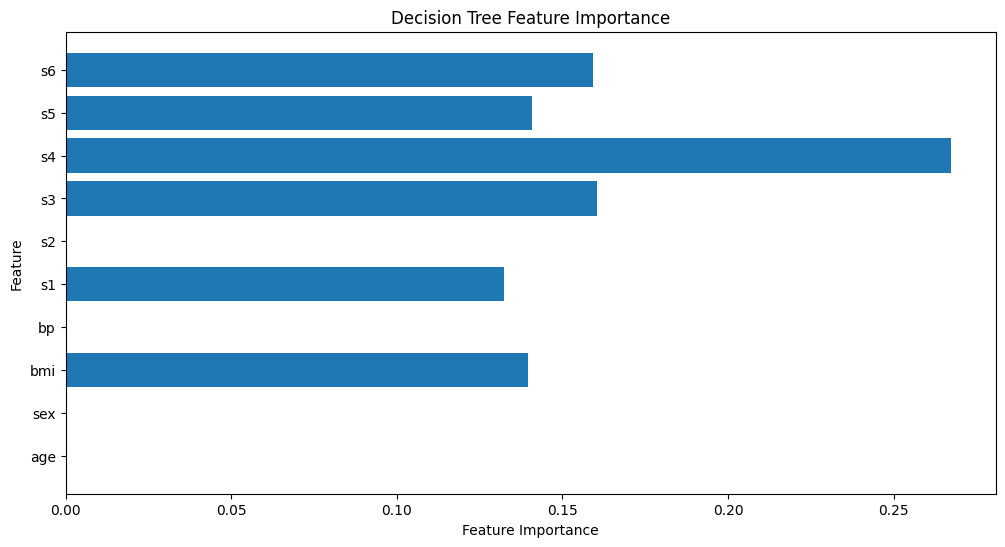

In [29]:
plt.figure(figsize=(12, 6))
plt.barh(data.feature_names, tree.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

## Построение графика для визуализации важности признаков в дереве решений

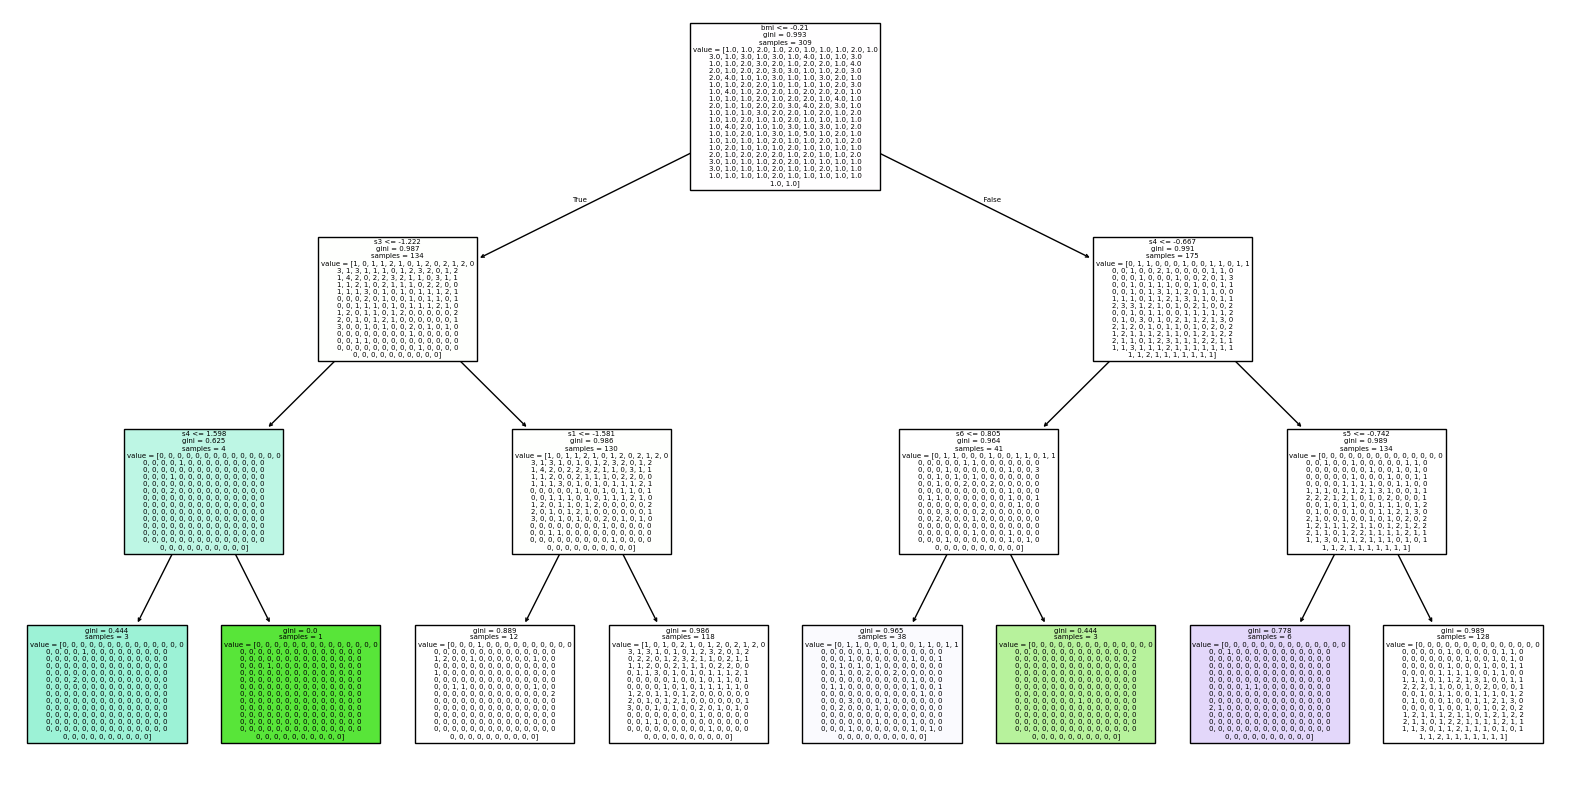

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, filled=True)
plt.show()